<a href="https://colab.research.google.com/github/saddam-satria/statistics-final/blob/master/statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import locale

In [43]:
file = files.upload()
df = None                
for key in file.keys(): 
    df = pd.read_excel(io.BytesIO(file[key]), names=["lt" , "harga"])


Saving dataset.xlsx to dataset.xlsx


In [44]:
x = df["lt"]
y = df["harga"]

In [45]:
print(df.head())

print(f"banyak data {df.shape}")

     lt        harga
0  1100  28000000000
1   824  19000000000
2   500   4700000000
3   251   4900000000
4  1340  28000000000
banyak data (30, 2)


             lt     harga
lt     1.000000  0.907992
harga  0.907992  1.000000


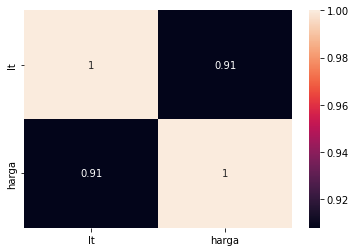

In [46]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


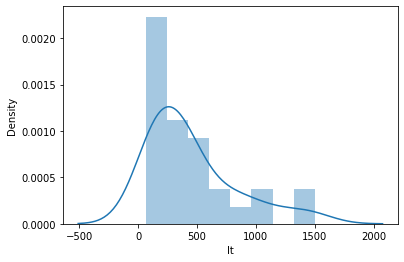

In [51]:
sns.distplot(df['lt'])

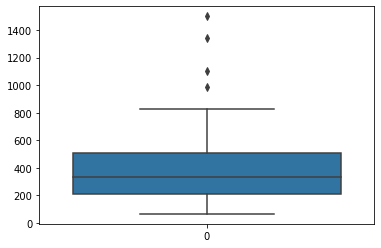

In [52]:
sns.boxplot(data=df['lt'])

In [53]:
df.describe()

,lt,harga
count,30.000000,3.000000e+01
mean,450.933333,1.208933e+10
std,377.672631,9.971822e+09
min,66.000000,4.800000e+08
25%,210.500000,5.357500e+09
50%,331.000000,8.900000e+09
75%,508.250000,1.385000e+10
max,1500.000000,4.000000e+10


In [54]:
model = LinearRegression()
X = np.array(df['lt']).reshape(-1,1)
Y = df.drop("lt", axis=1)
model.fit(X,Y)


intercept = model.intercept_[0]
coef = model.coef_[0][0]
y_pred = model.predict(X)

print("*"*10 + "Result" + "*" *10)
print(f"intercept: {intercept}")
print(f"coef: {coef}")
print(f"persamaan regresi: {intercept} + {coef} X")
print(f"R2 score {r2_score(Y, y_pred)}")
print(f"MSE {mean_squared_error(Y,y_pred)}")

**********Result**********
intercept: 1278638863.1520958
coef: 23974041.5512594
persamaan regresi: 1278638863.1520958 + 23974041.5512594 X
R2 score 0.8244503356823889
MSE 1.6874300618293785e+19


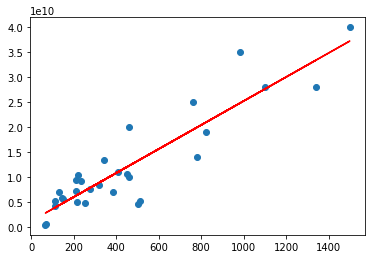

In [58]:
plt.scatter(X,Y)
plt.plot(X,y_pred, color='red')

In [82]:
sample_data = 120
new_value = intercept + (coef * sample_data)
locale.setlocale(locale.LC_ALL, '') 
print(f"hasil perhitungan menggunakan persamaan regresi Rp {locale.currency(new_value, grouping=True, symbol=False, international=False)}")

sample_data= np.array(sample_data).reshape(-1,1)
print(f"hasil perhitungan menggunakan model predict Rp {locale.currency(model.predict(sample_data)[0][0], symbol=False, grouping=True)}")



hasil perhitungan menggunakan persamaan regresi Rp 4,155,523,849.30
hasil perhitungan menggunakan model predict Rp 4,155,523,849.30
